In [226]:
using Plots
using Statistics

gr(legend=false)

Plots.GRBackend()

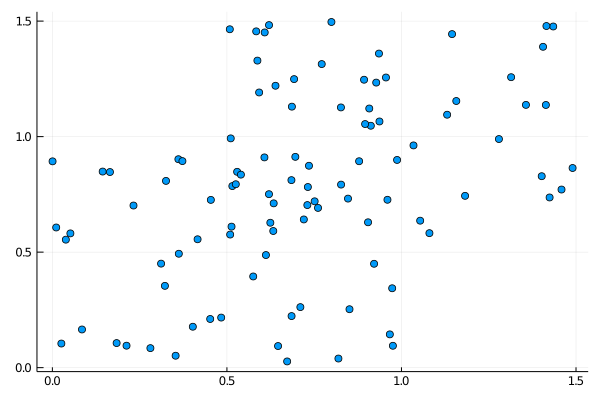

In [227]:
data_size = 100
K = 3
epoch = 1

cls1_x = rand(div(data_size, 2))
cls1_y = rand(div(data_size, 2))

cls2_x = rand(div(data_size, 2)) .+ 0.5
cls2_y = rand(div(data_size, 2)) .+ 0.5

x = vcat(cls1_x, cls2_x)
y = vcat(cls1_y, cls2_y)

data = hcat(x, y)

scatter(data[:, 1], data[:, 2])

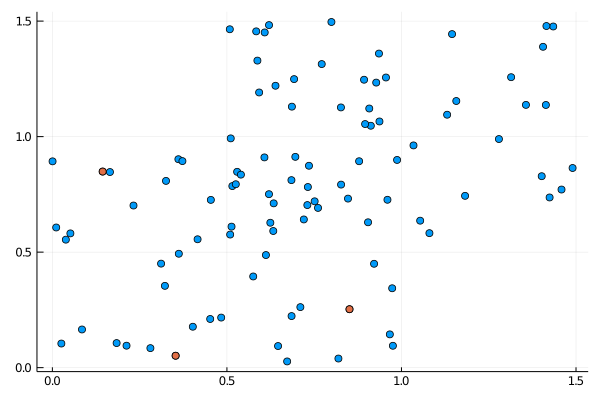

In [228]:
centroid_idx = rand(1:data_size, K)
centroids = data[centroid_idx, :]

scatter(data[:, 1], data[:, 2])
scatter!(centroids[:, 1], centroids[:, 2])

In [229]:
function euclidean_distance(data, centroid)
  centroid = reshape(centroid, (1, 2))
  return sum((data .- centroid).^2, dims=2).^0.5
end

function get_membership()
  len = size(data, 1)
  distances = zeros(len, K)
  
  for k = 1:K
    centroid = centroids[k, :]
    distance = euclidean_distance(data, centroid)
    distances[:, k] = distance
  end
  min_distances = argmin(distances, dims=2)
  return map(x->x[2], min_distances)
end

function update_centroid(membership)
  for k = 1:K
    cluster_k = (membership .== k)[:, 1]
    data_k = data[cluster_k, :]
    centroids[k, :] = mean(data_k, dims=1)
  end
end

update_centroid (generic function with 1 method)

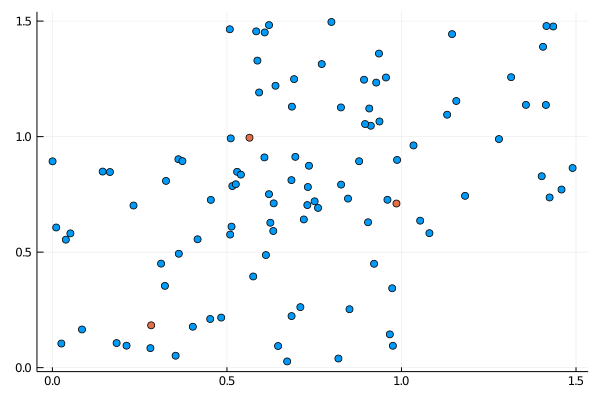

In [230]:
for i = 1:epoch
  membership = get_membership()
  update_centroid(membership)
end


scatter(data[:, 1], data[:, 2])
scatter!(centroids[:, 1], centroids[:, 2])

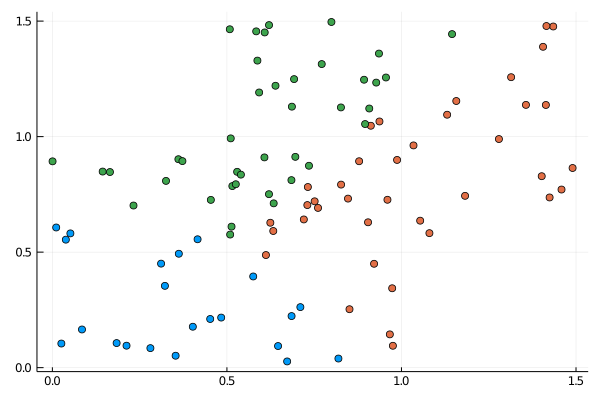

In [231]:
membership = get_membership()
p = plot()

for k = 1:K
  cluster_k = (membership .== k)[:, 1]
  data_k = data[cluster_k, :]
  
  if k == 1
    p = scatter(data_k[:, 1], data_k[:, 2])
  else
    scatter!(p, data_k[:, 1], data_k[:, 2])
  end
end

p